# Uniform Manifold Approximation and Projection (UMAP)
by Leland McInnes: https://github.com/lmcinnes/umap

Objective: I aim to compare the newly developed UMAP for Nonlinear Dimensionality Reduction. In order to do that I am using various dataset to compare UMAP mainly with t-SNE. For the first two examples (Swiss Roll Data, Severed Sphere) others comonly used dimensionality reductions methods are given for comparisons purposes. Let's get started.

The content: 

1. Swiss Roll Data
2. Severed Sphere
3. Handwritten Digits
4. Half-Moon Data
5. Concentric Circles

First let's quickly look at the abstract of the UMAP paper: 

UMAP (Uniform Manifold Approximation and Projection) is a novel manifold learning technique for dimension reduction. UMAP is constructed from a theoretical framework based in Riemannian geometry and algebraic topology. The result is a practical scalable algorithm that applies to real world data. The UMAP algorithm is competitive with t-SNE for visualization quality, and arguably preserves more of the global structure with superior run time performance. Furthermore, UMAP as described has no computational restrictions on embedding dimension, making it viable as a general purpose dimension reduction technique for machine learning.

### Advantageous over e.g. t-SNE:
 - UMAP is fast. It can handle large datasets and high dimensional data (beyond what t-SNE packages can).

 - UMAP isn't just for visualisation! You can use UMAP as a general purpose dimension reduction technique as a preliminary step to other machine learning tasks. It partners well with the hdbscan clustering.

- UMAP often performs better at preserving aspects of global structure of the data than t-SNE (better "big picture") 

- UMAP supports a wide variety of distance functions, including non-metric distance functions such as cosine distance and correlation distance. You can finally embed word vectors properly using cosine distance!

- UMAP has solid theoretical foundations in manifold learning (https://arxiv.org/abs/1802.03426). This both justifies the approach and allows for further extensions that will soon be added to the library (embedding dataframes, semi-supervised dimension reduction, etc.).


*disclaimer: I have borrowed code snippets from Scikit-learn, and a bit from Sebastian Raschka blog (https://sebastianraschka.com/)

In [45]:
import umap

from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.utils import check_random_state

import numpy as np
import  numpy  as  npnp
import seaborn as sns

%matplotlib inline
sns.set(style='white', rc={'figure.figsize':(12,8)})


## 1. Comparison of Dimensionality Reduction Methods (Swiss Roll Data)

PCA: 0.0012 sec
Standard LLE: 0.17 sec
Isomap: 0.4 sec
MDS: 2.6 sec
SpectralEmbedding: 0.089 sec
t-SNE: 23 sec
UMAP: 1.3 sec


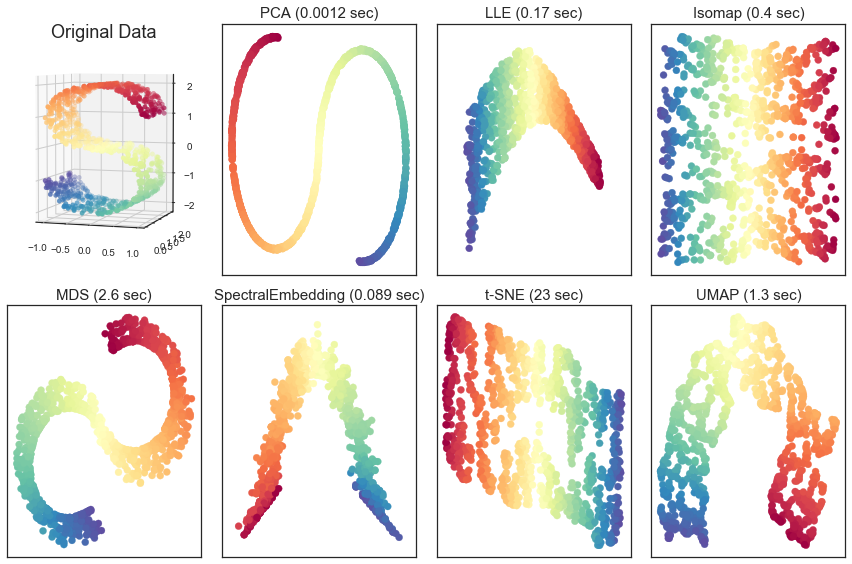

In [42]:
# Next line to silence pyflakes. This import is needed.
Axes3D

n_points = 1000
X, color = datasets.samples_generator.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2
font_size=15

fig = plt.figure(figsize=(12, 8))

ax = fig.add_subplot(241, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
plt.title("Original Data",fontsize=18)
ax.view_init(4, -72)
plt.tight_layout()


t0 = time()
Y =PCA(n_components=2).fit_transform(X)
t1 = time()
print("PCA: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(242)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("PCA (%.2g sec)" % (t1 - t0),fontsize=font_size)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
plt.tight_layout()


t0 = time()
Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                    eigen_solver='auto',
                                    method='standard').fit_transform(X)
t1 = time()
print("Standard LLE: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(243)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("LLE (%.2g sec)" % (t1 - t0),fontsize=font_size)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
plt.tight_layout()

t0 = time()
Y = manifold.Isomap(n_neighbors, n_components).fit_transform(X)
t1 = time()
print("Isomap: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(244)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Isomap (%.2g sec)" % (t1 - t0),fontsize=font_size)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
plt.tight_layout()

t0 = time()
mds = manifold.MDS(n_components, max_iter=100, n_init=1)
Y = mds.fit_transform(X)
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(245)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("MDS (%.2g sec)" % (t1 - t0),fontsize=font_size)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
plt.tight_layout()

t0 = time()
se = manifold.SpectralEmbedding(n_components=n_components,
                                n_neighbors=n_neighbors)
Y = se.fit_transform(X)
t1 = time()
print("SpectralEmbedding: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(246)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("SpectralEmbedding (%.2g sec)" % (t1 - t0),fontsize=font_size)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
plt.tight_layout()

t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
Y = tsne.fit_transform(X)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(247)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("t-SNE (%.2g sec)" % (t1 - t0),fontsize=font_size)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
plt.tight_layout()

t0 = time()
umap_emb=umap.UMAP(n_neighbors=n_neighbors,
                min_dist=0.5,
                n_components=n_components,
                metric='euclidean')
Y = umap_emb.fit_transform(X)
t1 = time()
print("UMAP: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(248)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("UMAP (%.2g sec)" % (t1 - t0),fontsize=font_size)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
plt.tight_layout()

## 2. Comparison of Dimensionality Reduction Methods (Severed Sphere)

PCA: 0.0018 sec
Standard LLE: 0.14 sec
Isomap: 0.23 sec
MDS: 1.4 sec
SpectralEmbedding: 0.064 sec
t-SNE: 15 sec
UMAP: 0.89 sec


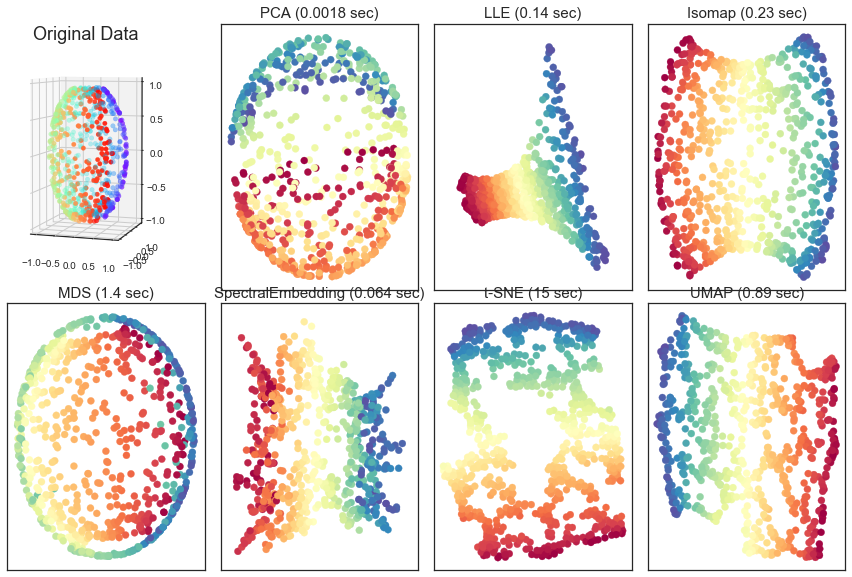

In [63]:

# Next line to silence pyflakes.
Axes3D

# Variables for manifold learning.
n_neighbors = 10
n_samples = 1000

# Create our sphere.
random_state = check_random_state(0)
p = random_state.rand(n_samples) * (2 * np.pi - 0.55)
t = random_state.rand(n_samples) * np.pi

# Sever the poles from the sphere.
indices = ((t < (np.pi - (np.pi / 8))) & (t > ((np.pi / 8))))
colors = p[indices]
x, y, z = np.sin(t[indices]) * np.cos(p[indices]), \
    np.sin(t[indices]) * np.sin(p[indices]), \
    np.cos(t[indices])

# Plot our dataset.
fig = plt.figure(figsize=(12, 8))

ax = fig.add_subplot(251, projection='3d')
ax.scatter(x, y, z, c=p[indices], cmap=plt.cm.rainbow)
ax.view_init(4, -72)
plt.title("Original Data",fontsize=18)
plt.tight_layout()

sphere_data = np.array([x, y, z]).T

t0 = time()
Y =PCA(n_components=2).fit_transform(sphere_data).T
t1 = time()
print("PCA: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(242)
plt.scatter(Y[0], Y[1], c=colors, cmap=plt.cm.Spectral)
plt.title("PCA (%.2g sec)" % (t1 - t0),fontsize=font_size)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


t0 = time()
Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                    eigen_solver='auto',
                                    method='standard').fit_transform(sphere_data).T
t1 = time()
print("Standard LLE: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(243)
plt.scatter(Y[0], Y[1], c=colors, cmap=plt.cm.Spectral)
plt.title("LLE (%.2g sec)" % (t1 - t0),fontsize=font_size)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

t0 = time()
Y = manifold.Isomap(n_neighbors, n_components).fit_transform(sphere_data).T
t1 = time()
print("Isomap: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(244)
plt.scatter(Y[0], Y[1], c=colors, cmap=plt.cm.Spectral)
plt.title("Isomap (%.2g sec)" % (t1 - t0),fontsize=font_size)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

t0 = time()
mds = manifold.MDS(n_components, max_iter=100, n_init=1)
Y = mds.fit_transform(sphere_data).T
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(245)
plt.scatter(Y[0], Y[1], c=colors, cmap=plt.cm.Spectral)
plt.title("MDS (%.2g sec)" % (t1 - t0),fontsize=font_size)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

t0 = time()
se = manifold.SpectralEmbedding(n_components=n_components,
                                n_neighbors=n_neighbors)
Y = se.fit_transform(sphere_data).T
t1 = time()
print("SpectralEmbedding: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(246)
plt.scatter(Y[0], Y[1], c=colors, cmap=plt.cm.Spectral)
plt.title("SpectralEmbedding (%.2g sec)" % (t1 - t0),fontsize=font_size)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
Y = tsne.fit_transform(sphere_data).T
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(247)
plt.scatter(Y[0], Y[1], c=colors, cmap=plt.cm.Spectral)
plt.title("t-SNE (%.2g sec)" % (t1 - t0),fontsize=font_size)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

t0 = time()
umap_emb=umap.UMAP(n_neighbors=n_neighbors,
                min_dist=0.5,
                n_components=n_components,
                metric='euclidean')
Y = umap_emb.fit_transform(sphere_data).T
t1 = time()
print("UMAP: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(248)
plt.scatter(Y[0], Y[1], c=colors, cmap=plt.cm.Spectral)
plt.title("UMAP (%.2g sec)" % (t1 - t0),fontsize=font_size)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight');


## 3. UMAP vs. t-SNE on Handwritten Digits

In [79]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import CategoricalColorMapper, ColumnDataSource
from bokeh.palettes import Category10
from bokeh.io import output_notebook
output_notebook()

t0 = time()

digits = load_digits()
embedding = umap.UMAP(n_neighbors=10, 
                      min_dist=0.4,
                      metric='correlation',
                      n_components=2).fit_transform(digits.data)
t1 = time()

print("UMAP: %.2g sec" % (t1 - t0))

#output_file("digits.html")

targets = [str(d) for d in digits.target_names]

source = ColumnDataSource(dict(
    x = [e[0] for e in embedding],
    y = [e[1] for e in embedding],
    label = [targets[d] for d in digits.target]
))

cmap = CategoricalColorMapper(factors=targets, palette=Category10[10])

p = figure(title="UMAP on Handwritten Digits")
p.circle(x='x',
         y='y',
         source=source,
         color={"field": 'label', "transform": cmap},
         legend='label')

show(p)

Loading BokehJS ...

UMAP: 3 sec


In [80]:
output_notebook()

digits = load_digits()

t0 = time()

embedding = manifold.TSNE(n_components=2, init='pca', random_state=0).fit_transform(digits.data)

t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))


targets = [str(d) for d in digits.target_names]

source = ColumnDataSource(dict(
    x = [e[0] for e in embedding],
    y = [e[1] for e in embedding],
    label = [targets[d] for d in digits.target]
))

cmap = CategoricalColorMapper(factors=targets, palette=Category10[10])

p = figure(title="t-SNE on Handwritten Digits")
p.circle(x='x',
         y='y',
         source=source,
         color={"field": 'label', "transform": cmap},
         legend='label')

show(p)

Loading BokehJS ...

t-SNE: 38 sec


## 4. UMAP vs. t-SNE on Half-Moon Data

t-SNE: 1.3 sec
UMAP: 0.12 sec


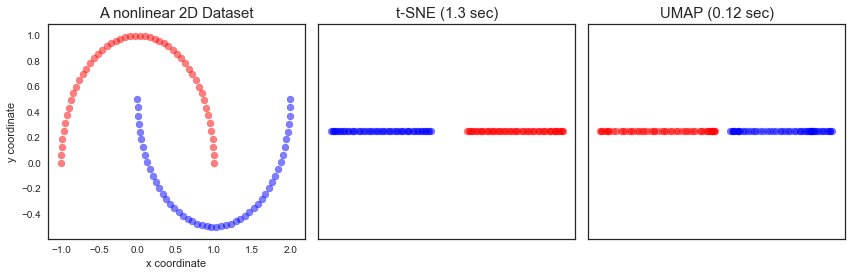

In [99]:
X, y = datasets.make_moons(n_samples=100, random_state=123)

# Plot our dataset.
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(131)

ax.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
ax.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)

plt.title('A nonlinear 2D Dataset',fontsize=font_size)
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')

plt.tight_layout()


t0 = time()
tsne = manifold.TSNE(n_components=2, 
                     perplexity=15.0,
                     metric='euclidean',
                     init='pca', 
                     random_state=0)
Y = tsne.fit_transform(X)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(132)

plt.scatter(Y[y==0, 0], np.zeros((50,1)), color='red', alpha=0.5)
plt.scatter(Y[y==1, 0], np.zeros((50,1)), color='blue', alpha=0.5)
plt.title("t-SNE (%.2g sec)" % (t1 - t0),fontsize=font_size)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
plt.tight_layout()

t0 = time()
umap_emb=umap.UMAP(n_neighbors=n_neighbors,
                min_dist=0.5,
                n_components=2,
                metric='euclidean')
Y = umap_emb.fit_transform(X)
t1 = time()
print("UMAP: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(133)

plt.scatter(Y[y==0, 0], np.zeros((50,1)), color='red', alpha=0.5)
plt.scatter(Y[y==1, 0], np.zeros((50,1)), color='blue', alpha=0.5)
plt.title("UMAP (%.2g sec)" % (t1 - t0),fontsize=font_size)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
plt.tight_layout()


## 5. UMAP vs. t-SNE on Concentric Circles

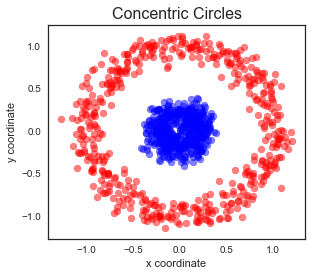

In [129]:
X, y = datasets.make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)


# Plot our dataset.
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(131)

ax.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
ax.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)

plt.title('Concentric Circles',fontsize=16)
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')
plt.tight_layout()

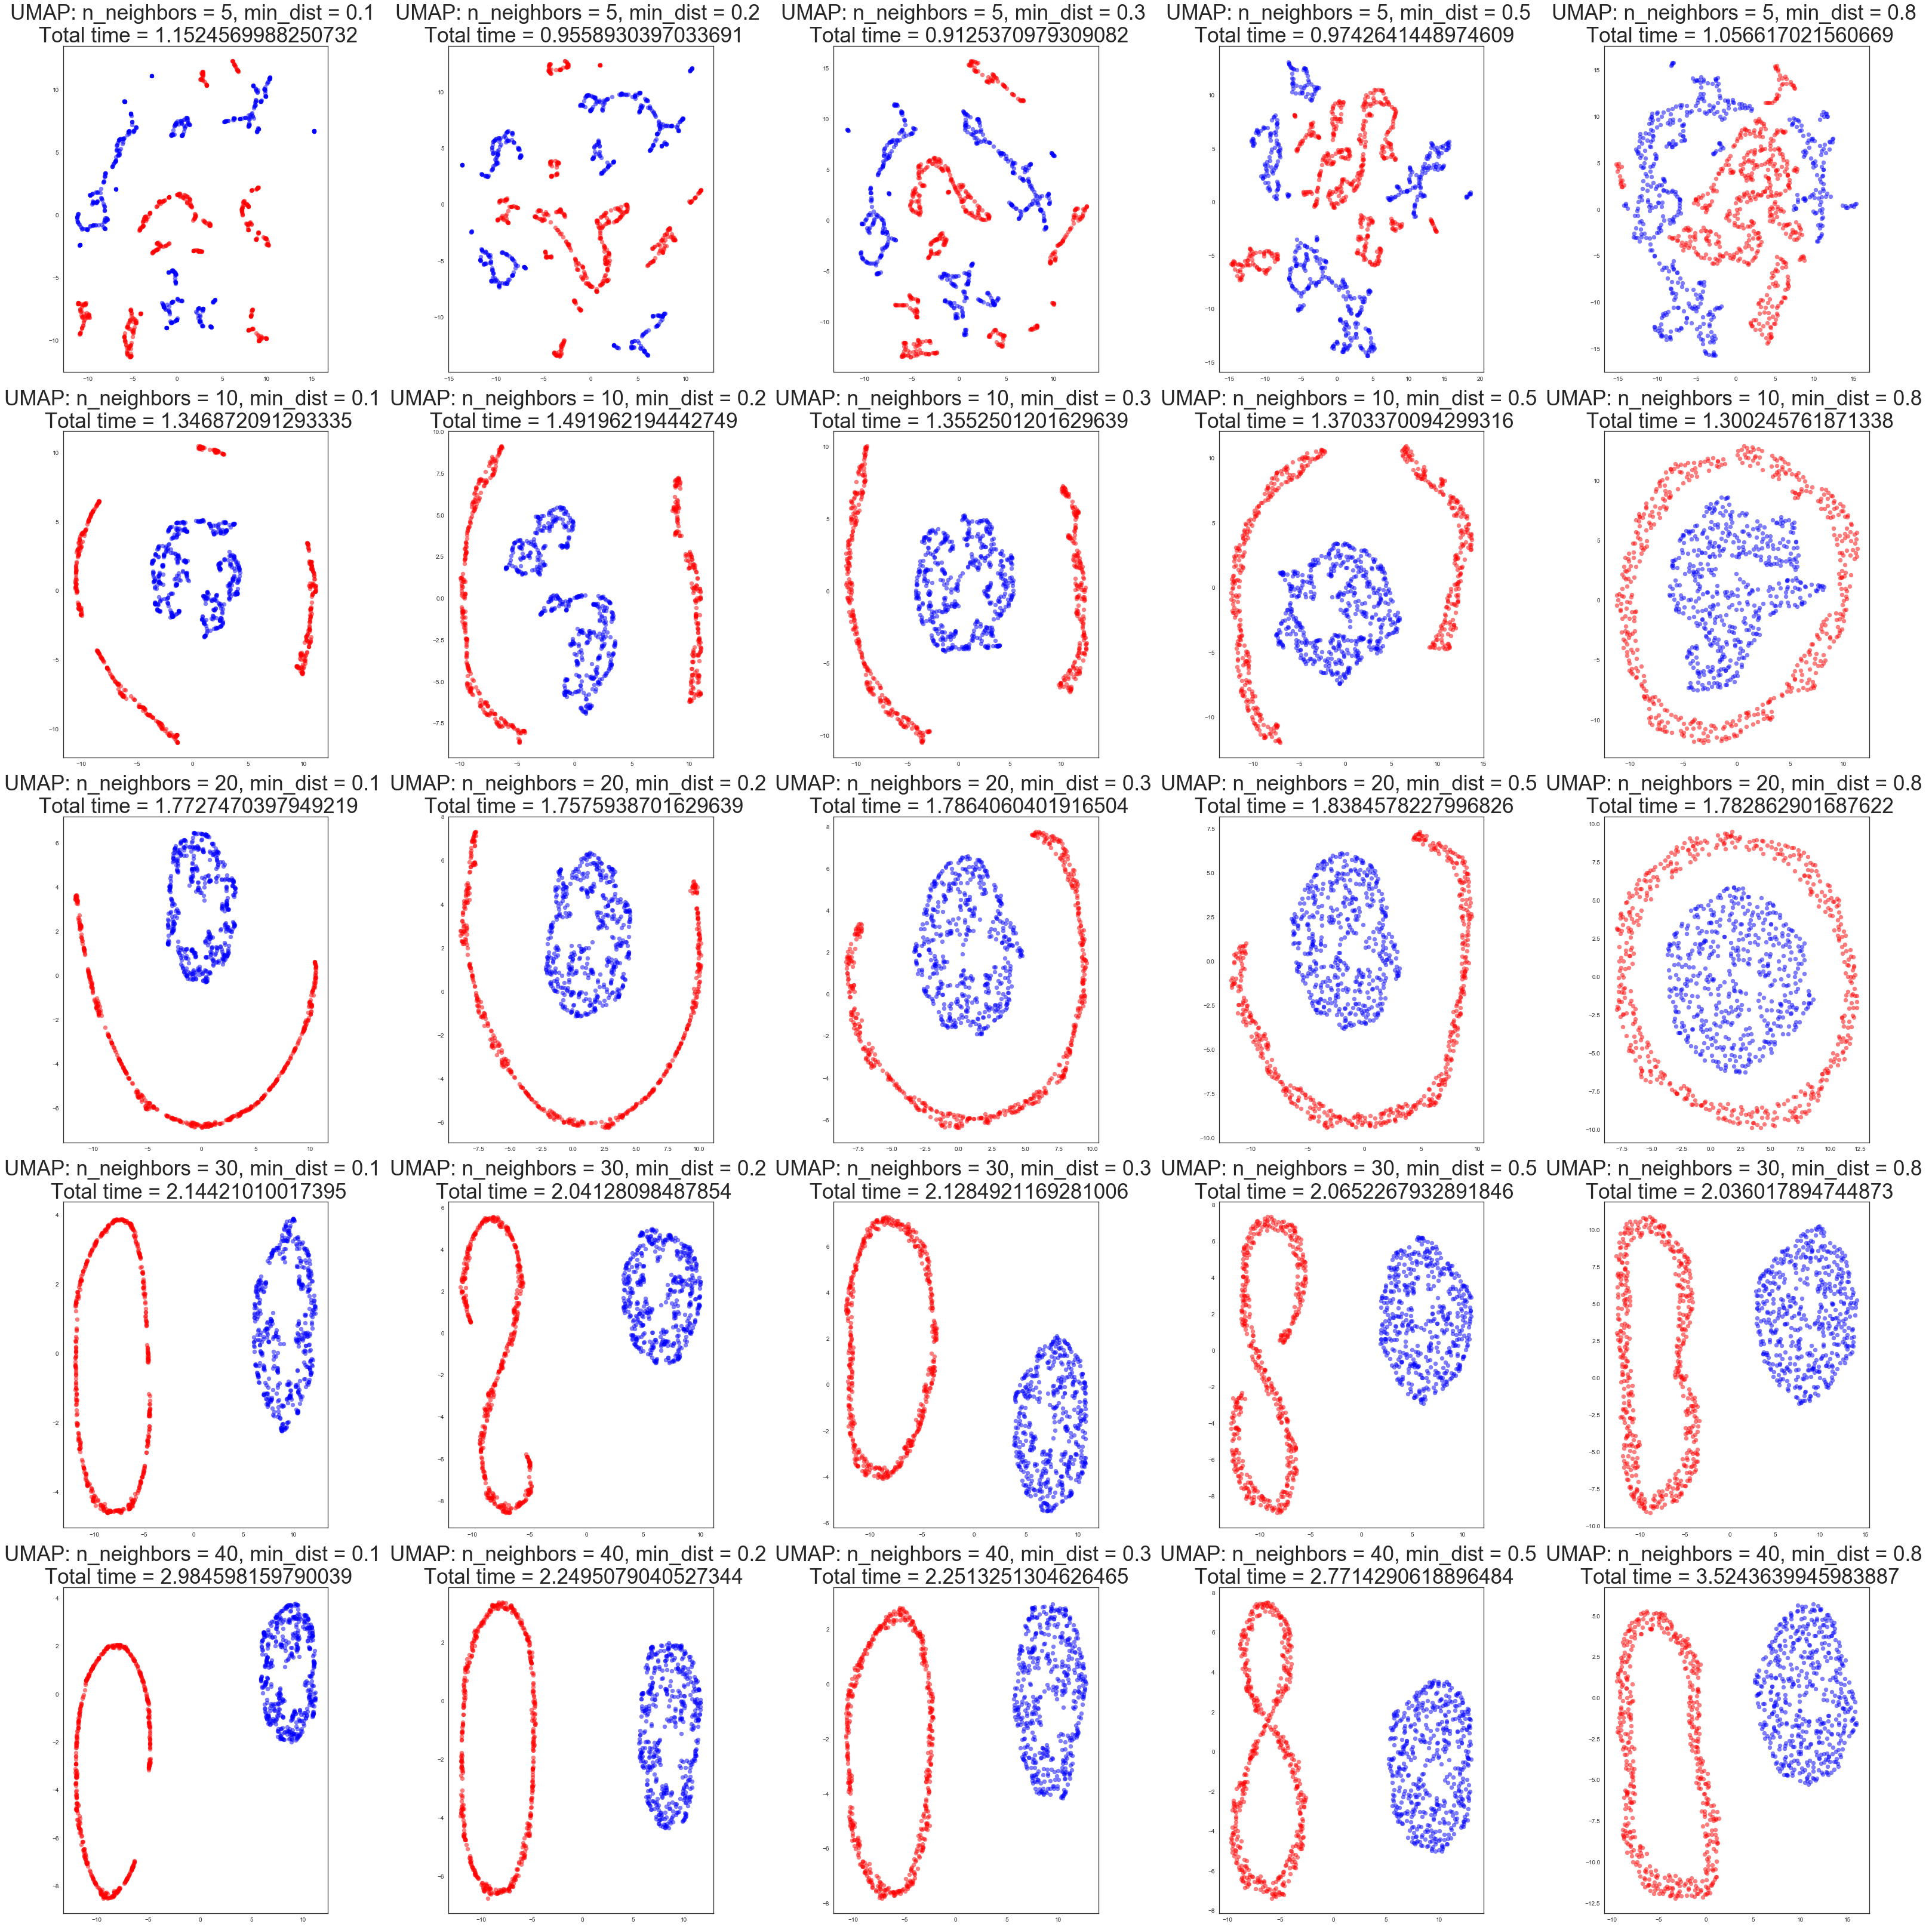

In [131]:
from pylab import rcParams
rcParams['figure.figsize'] = 45, 45

n_neighbors = [5, 10, 20, 30, 40]
min_dist = [0.1, 0.2, 0.3, 0.5, 0.8]

X, y = datasets.make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

fig, ax = plt.subplots(len(n_neighbors),len(min_dist),sharex='none')

for i,n in enumerate(n_neighbors):
    for j,d in enumerate(min_dist):
        
        t0 = time()
        Y=umap.UMAP(n_neighbors=n,
                            min_dist=d,
                            n_components=2,
                            metric='euclidean').fit_transform(X)
        t1 = time()
        total_time=(t1 - t0)
        
        ax[i,j].scatter(Y[y==0, 0], Y[y==0, 1], color='red', alpha=0.5)
        ax[i,j].scatter(Y[y==1, 0], Y[y==1, 1], color='blue', alpha=0.5)

        ax[i,j].set_title('UMAP: n_neighbors = {}, min_dist = {} \n Total time = {}'.format(n,d,total_time),fontsize=35)
        plt.tight_layout()

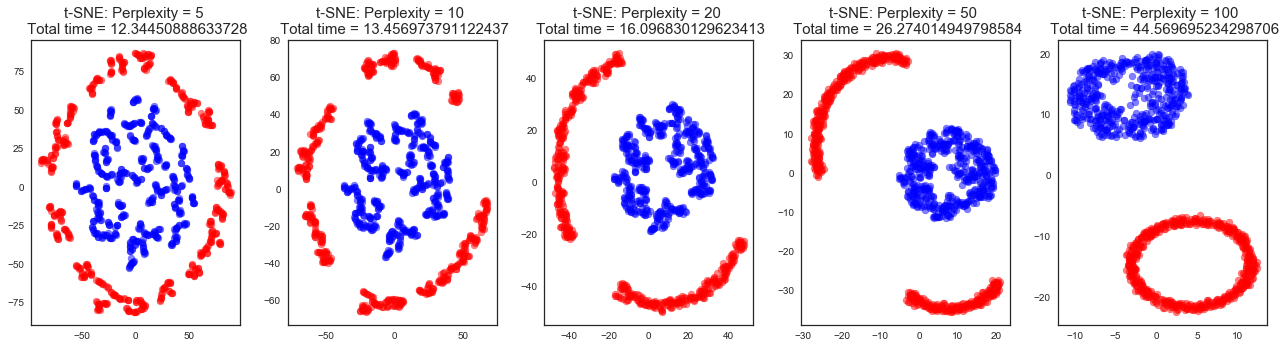

In [142]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 5

perplexity = [5, 10, 20, 50, 100]

X, y = datasets.make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

for i,perX in enumerate(perplexity):
        
        t0 = time()
        tsne = manifold.TSNE(n_components=2, 
                     perplexity=perX,
                     metric='euclidean',
                     init='pca', 
                     random_state=0)
        Y = tsne.fit_transform(X)

        t1 = time()
        total_time=(t1 - t0)
        
        plt.subplot(1,5,i+1)
        plt.scatter(Y[y==0, 0], Y[y==0, 1], color='red', alpha=0.5)
        plt.scatter(Y[y==1, 0], Y[y==1, 1], color='blue', alpha=0.5)
        plt.title('t-SNE: Perplexity = {} \n Total time = {}'.format(perX,total_time),fontsize=15)
        
        plt.tight_layout()


## Appendix (More on UMAP based on Swiss Roll Data)

### 1. Chebyshev

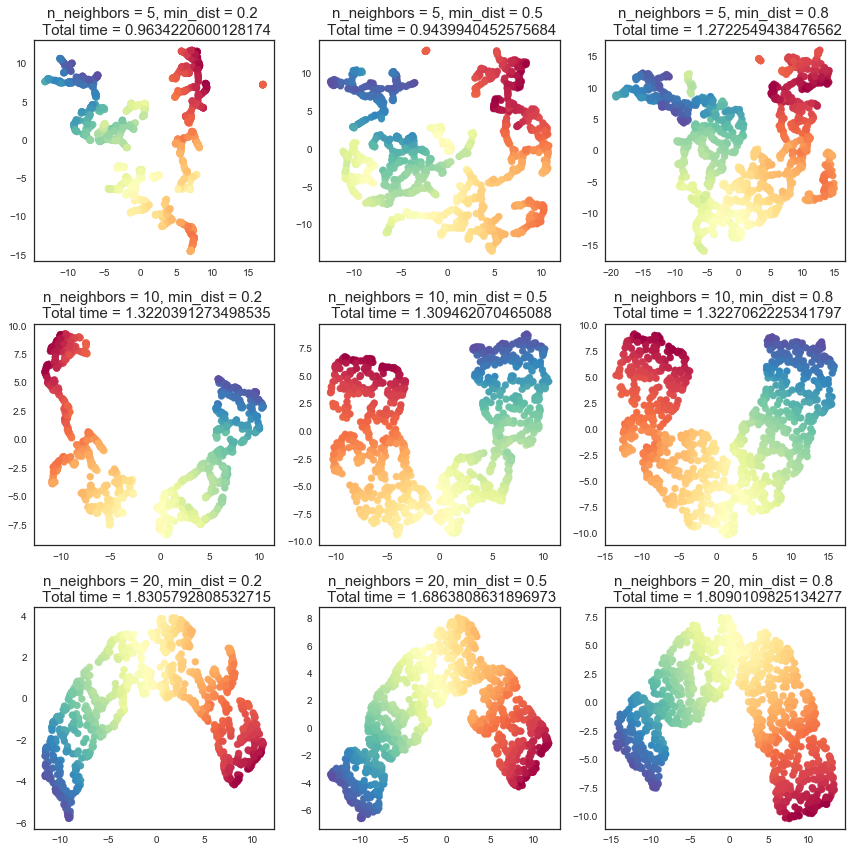

In [144]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 12

n_points = 1000
X, color = datasets.samples_generator.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2
font_size=15

n_neighbors = [5, 10, 20]
min_dist = [0.2, 0.5, 0.8]


fig, ax = plt.subplots(len(n_neighbors),len(min_dist),sharex='none')

for i,n in enumerate(n_neighbors):
    for j,d in enumerate(min_dist):
        
        t0 = time()
        embedding=umap.UMAP(n_neighbors=n,
                            min_dist=d,
                            n_components=2,
                            metric='chebyshev').fit_transform(X)
        t1 = time()
        total_time=(t1 - t0)
        
        ax[i,j].scatter(embedding[:,0], embedding[:,1],c=color, cmap=plt.cm.Spectral)
        
        ax[i,j].set_title('n_neighbors = {}, min_dist = {} \n Total time = {}'.format(n,d,total_time),fontsize=15)
        plt.tight_layout()

### 2. Cosine

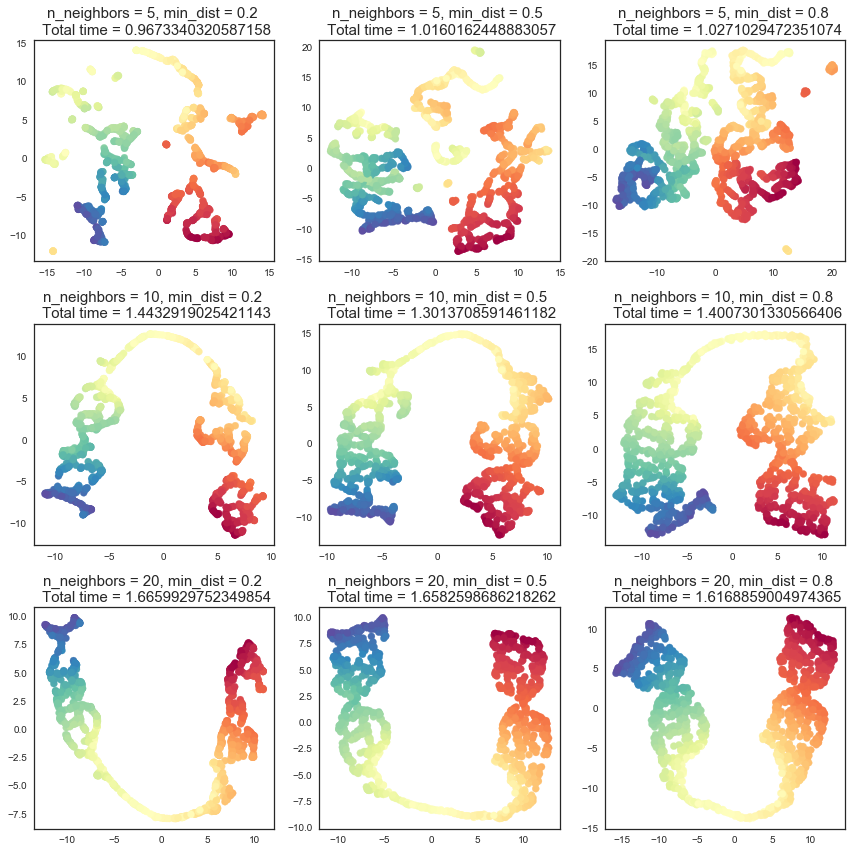

In [145]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 12

n_points = 1000
X, color = datasets.samples_generator.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2
font_size=15

n_neighbors = [5, 10, 20]
min_dist = [0.2, 0.5, 0.8]


fig, ax = plt.subplots(len(n_neighbors),len(min_dist),sharex='none')

for i,n in enumerate(n_neighbors):
    for j,d in enumerate(min_dist):
        
        t0 = time()
        embedding=umap.UMAP(n_neighbors=n,
                            min_dist=d,
                            n_components=2,
                            metric='cosine').fit_transform(X)
        t1 = time()
        total_time=(t1 - t0)
        
        ax[i,j].scatter(embedding[:,0], embedding[:,1],c=color, cmap=plt.cm.Spectral)
        
        ax[i,j].set_title('n_neighbors = {}, min_dist = {} \n Total time = {}'.format(n,d,total_time),fontsize=15)
        plt.tight_layout()